Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.2) 트위터 API로 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 전처리> : 형태소 추출](#<Step2.-전처리>-:-형태소-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 형태소 추출]
- [<Step3. 분석> : 키워드 분석](#<Step3.-분석>-:-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]
- API 사용법 참고 : https://github.com/yoonkt200/python-data-analysis/blob/master/chapter_text/(%EC%B0%B8%EA%B3%A0)%20using-twitter-api.ipynb

##### 트위터 API 가져오기

In [2]:
# import tweepy

# CONSUMER_KEY = "NH3A7KS5YFuCKNoYlINySOOJt"
# CONSUMER_SECRET = "ifVNgtyap1CtUF9LGDmbZwYDCD3bxS3T2P3pKJ1359djoEAOOM"
# ACCESS_TOKEN_KEY = "528726526-yb18kJFQ4m0sAN54UHpikXxR28qenSG5joUTLlIE"
# ACCESS_TOKEN_SECRET = "UyUnZcXJPZ7er5gjqD0iW1AtWDPav0D0q2wxDNGyx3hrX"

# # 개인정보 인증 요청 Handler
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# # 인증 요청
# auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# # twitter API 가져오기
# api = tweepy.API(auth)

-----

##### '손흥민' 키워드 검색

In [13]:
# keyword = "손흥민"
# tweets = api.search(keyword)
# for tweet in tweets:
#     print(tweet.text)
#     print(tweet.entities['user_mentions'])
#     print(tweet.entities['hashtags'])
#     print(tweet.created_at)

RT @haribo_korea: 계정지기 실수로 삭제해버려서 다시 올리는 #EVENT #하리보 #손흥민 홍보모델 발탁 기념

해당글 RT 하신 분들 중 추첨을 통해 2분에게 하리보 골드바렌 220g을 2통씩 드립니다 ⁽(◍˃̵͈̑ᴗ˂̵͈̑)⁽

기간…
[{'screen_name': 'haribo_korea', 'name': 'HARIBO KOREA', 'id': 1032923568256966657, 'id_str': '1032923568256966657', 'indices': [3, 16]}]
[{'text': 'EVENT', 'indices': [41, 47]}, {'text': '하리보', 'indices': [48, 52]}, {'text': '손흥민', 'indices': [53, 57]}]
2019-04-01 10:42:18
RT @seven_9278: 안녕하십니까 손흥민입니다. 
오랜만에 트위터에 들어오니 매우 어색하네요....^^
오늘 경기도 많은 관심 부탁드립니다...^^
[{'screen_name': 'seven_9278', 'name': 'Son HeungMin(손흥민)🇰🇷', 'id': 3616654872, 'id_str': '3616654872', 'indices': [3, 14]}]
[]
2019-04-01 10:40:51
RT @haribo_korea: 계정지기 실수로 삭제해버려서 다시 올리는 #EVENT #하리보 #손흥민 홍보모델 발탁 기념

해당글 RT 하신 분들 중 추첨을 통해 2분에게 하리보 골드바렌 220g을 2통씩 드립니다 ⁽(◍˃̵͈̑ᴗ˂̵͈̑)⁽

기간…
[{'screen_name': 'haribo_korea', 'name': 'HARIBO KOREA', 'id': 1032923568256966657, 'id_str': '1032923568256966657', 'indices': [3, 16]}]
[{'text': 'EVENT', 'indices': [41, 47]}, {'text': '하리보', 'indices': [4

-----

##### 데이터 프레임 형태로 수집

In [30]:
# columns = ['created', 'tweet_text']
# df = pd.DataFrame(columns=columns)

# for i in range(1,500):
#     print("Get data", str(i/500*100), "% complete..")
#     tweets = api.search(keyword)
#     for tweet in tweets:
#         tweet_text = tweet.text
#         created = tweet.created_at
#         row = [created, tweet_text]
#         series = pd.Series(row, index=df.columns)
#         df = df.append(series, ignore_index=True)
# print("Get data 100 % complete..")

Get data 0.1 % complete..
Get data 0.2 % complete..
Get data 0.3 % complete..
Get data 0.4 % complete..
Get data 0.5 % complete..
Get data 0.6 % complete..
Get data 0.7000000000000001 % complete..
Get data 0.8 % complete..
Get data 0.8999999999999999 % complete..
Get data 1.0 % complete..
Get data 1.0999999999999999 % complete..
Get data 1.2 % complete..
Get data 1.3 % complete..
Get data 1.4000000000000001 % complete..
Get data 1.5 % complete..
Get data 1.6 % complete..
Get data 1.7000000000000002 % complete..
Get data 1.7999999999999998 % complete..
Get data 1.9 % complete..
Get data 2.0 % complete..
Get data 2.1 % complete..
Get data 2.1999999999999997 % complete..
Get data 2.3 % complete..
Get data 2.4 % complete..
Get data 2.5 % complete..
Get data 2.6 % complete..
Get data 2.7 % complete..
Get data 2.8000000000000003 % complete..
Get data 2.9000000000000004 % complete..
Get data 3.0 % complete..
Get data 3.1 % complete..
Get data 3.2 % complete..
Get data 3.3000000000000003 % com

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [31]:
# print(df.shape)
# df.sample(10).head()

(525, 2)


,created,tweet_text
159,2019-04-01 10:38:32,RT @haribo_korea: 계정지기 실수로 삭제해버려서 다시 올리는 #EVEN...
488,2019-04-01 10:40:51,RT @seven_9278: 안녕하십니까 손흥민입니다. \n오랜만에 트위터에 들어오...
404,2019-04-01 10:31:11,RT @haribo_korea: ⚠️ 긴급속보 ⚠️\n\n#하리보 신제품이 나온다고...
507,2019-04-01 10:31:55,RT @O9OP0LWykDTpvwn: 🇰🇷한국축구국가대표팀 조현우 손흥민 황의조선수...
356,2019-04-01 10:35:21,RT @YANHTR: 190327 출국\nhttps://t.co/EjoNHYj4wV...


In [32]:
# df.to_csv("tweet_temp.csv", index=False)

-----

# <Step2. 전처리> : 형태소 추출

### [텍스트 데이터 전처리]

- `(env_name) pip install nltk` 를 실행하여 패키지 설치

In [256]:
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...


In [257]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [258]:
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...


-----

### [konlpy를 이용한 형태소 추출]

In [259]:
from konlpy.tag import Twitter
from collections import Counter

# 한국어 약식 불용어사전 예시 (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"
with open(korean_stopwords_path) as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Twitter()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [260]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
df.head()

,created,tweet_text,ko_text,nouns
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,,[]
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스,"[트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...,"[손흥민, 말씀]"
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민,[손흥민]
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...,"[경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,..."


-----

# <Step3. 분석> : 키워드 분석

### [연관 키워드 추출하기]

- `(env_name) pip install apriori apyori` 를 실행하여 패키지 설치

##### 연관 분석 연습

In [261]:
from apyori import apriori

transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [262]:
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'케인', '손흥민'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

-----

##### 트위터 연관 키워드 분석

In [263]:
# 트랜잭션 데이터 추출
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction]
print(transactions)

[['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '모델', '기용', '출처', '한국', '경제', '네이버', '뉴스'], ['손흥민', '말씀'], ['손흥민'], ['경남', '도민', '일보', '프로축구', '연맹', '경기장', '선거운동', '손흥민', '영국', '관중', '인종차별', '행위', '보고', '축구장', '선거운동', '규정', '위반', '이야기'], ['선택', '손흥민', '축구'], ['토트넘', '골수팬', '승부사', '제일', '선수', '손흥민', '입다'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['안녕하십니까', '손흥민', '트위터', '매우', '오늘', '경기도', '관심'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['출국', '손흥민'], ['출국', '손흥민'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['긴급', '속보', '하리보', '신제품', '손흥민', '개시', '하리보', '신제품', '샤인', '가장', '먼저', '보고', '팔로우', '알림', '설정', '두기', '하리보', '신제품'], ['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '

In [264]:
# 연관 분석
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=5,
                       max_length=2))
print(len(results))
print(results)

114
[RelationRecord(items=frozenset({'게임', '국가대표팀'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'게임', '금메달'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'게임', '모습'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'게임', '아시아'}), support=0.14285714285714285

In [265]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,게임,국가대표팀,0.142857
1,게임,금메달,0.142857
2,게임,모습,0.142857
3,게임,아시아,0.142857
4,게임,의조,0.142857


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [266]:
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

In [267]:
from konlpy.tag import Twitter
from collections import Counter

nouns_tagger = Twitter()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


-----

##### 단어 빈도 점수 추가

In [278]:
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 노드사이즈 50 이하는 제거
node_df.head()

,node,nodesize
2,축구,140
4,손흥민,560
5,선수,140
7,모델,105
10,한국,105


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

- `(env_name) pip install networkx` 를 실행하여 패키지 설치

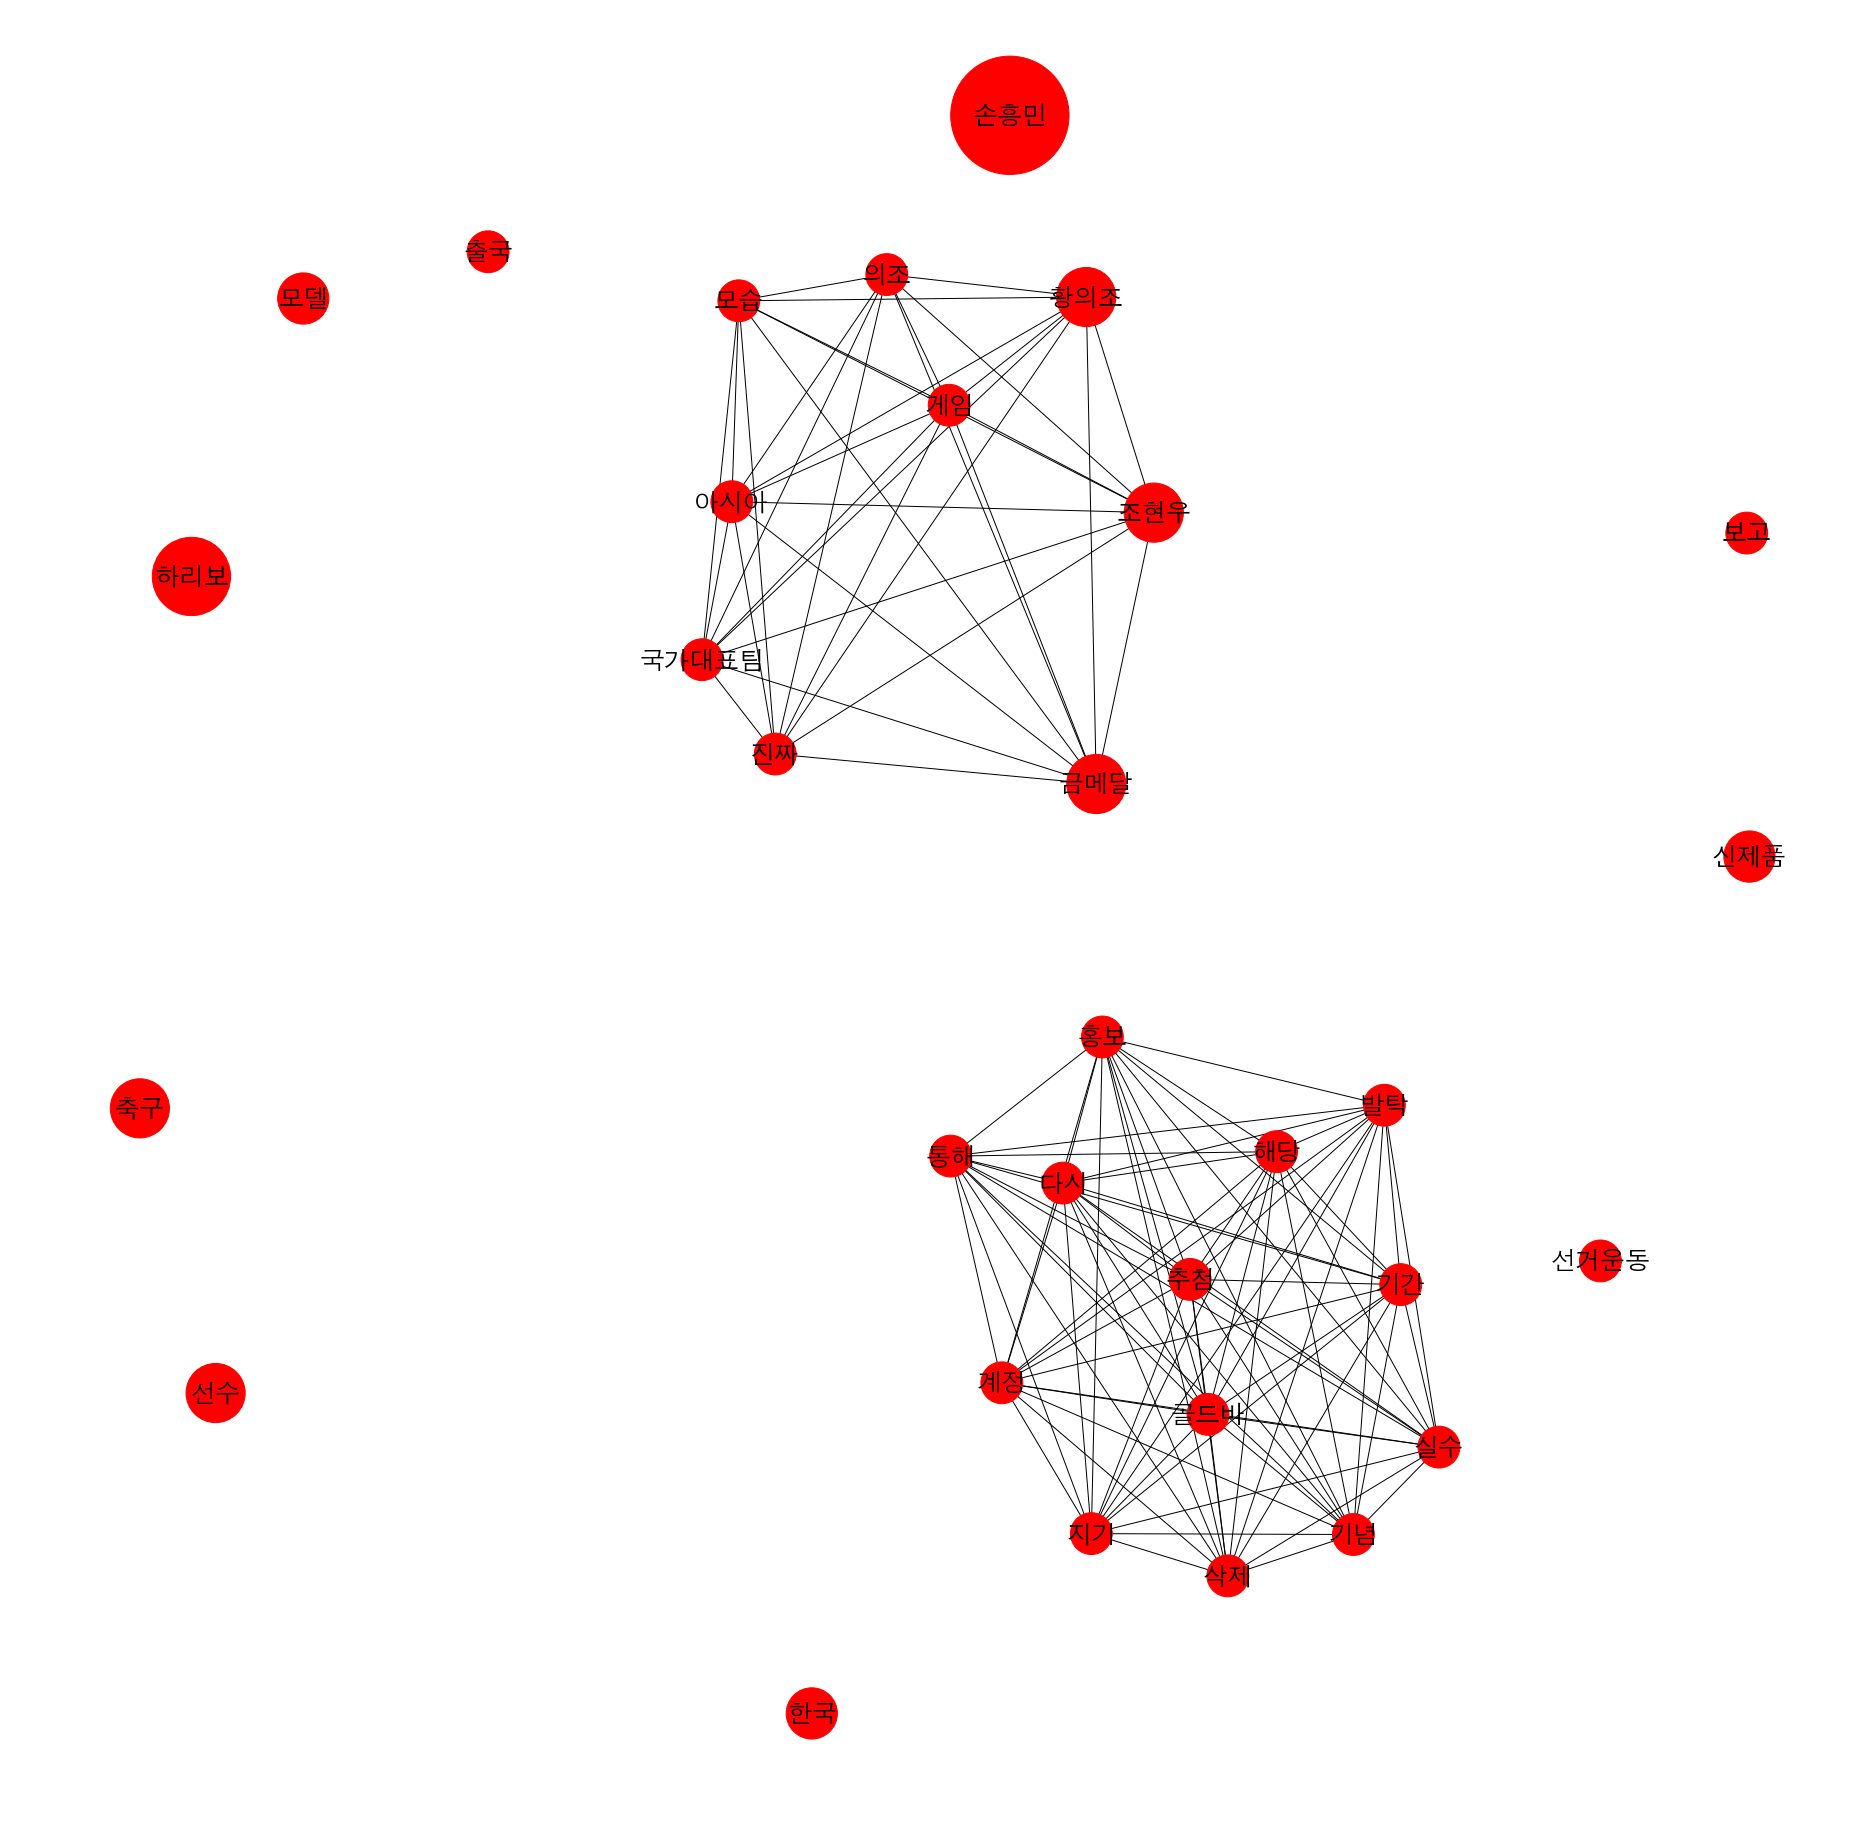

In [289]:
import networkx as nx
plt.figure(figsize=(25,25))

G = nx.Graph()
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.node[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)
nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic', font_size=25)

ax = plt.gca()
plt.show()